# Logistic Regression

邏輯斯迴歸模型是在機器學習中常見的分類模型，專門用來處理類別型資料，而其中又分為 **Binary Classification** 以及 **Multi-class Classification**

於原理上，可以發現邏輯斯迴歸模型與線性迴歸模型很像，都是要找到一條線來進行預測。然而，使用上的意義卻是完全不同，對於邏輯斯回歸而言，我們找到的這條線是想要將資料點在一個空間中能夠切出不同分類的結果，透過最大似然估計的方式預估這條線的係數。

其中，羅吉斯迴歸用到的 logit 函數，也被稱作 Sigmoid 函數，在深度學習領域常被拿來使用或是比較，可以將任意輸入值輸出成0到1之間的函數

sigmoid: $\sigma(x)= \frac{e^{x}}{1+e^{x}} = \frac{1}{1+e^{-x}}$

寫過來我們的機率函數變成
$p(x) = \frac{1}{1 + e^{-(\beta_0+\beta_1 x_1+\beta_2 x_2+ \ldots +\beta_p x_p)}} = \sigma(\beta_0+\beta_1 x_1+\beta_2 x_2+ \ldots +\beta_p x_p)$

轉換為邏輯斯回歸的形式 $logit(p) = log(odds) = log(\frac{p(x)}{1-p(x)}) = \beta_0+\beta_1 x_1+\beta_2 x_2 + \ldots +\beta_p x_p$

羅吉斯回歸方程式將類別型態的反應變數轉換為事件的 log odds 值，也就是 $log(\frac{P_i}{1 - P_i})$
⟯，來預測與自變數($X_1$ ~ $X_n$) 的線性關係，接下來邏輯斯迴歸模型將會用**最大概似估計法**求解，並且找出最佳的 Beta 估計值，通常這個步驟就會交由我們偉大的 sklearn 來幫我們完成！

In [1]:
'''
案例使用 sklearn 中的一個資料集 - breast_cancer，用來示範邏輯斯回歸模型的使用;
該資料集用不同的照片轉數據的特徵來判斷該病患是否罹患乳癌 (良性：benign(1)，惡性：malignant(0));
該分析的資料屬於 Binary Classification;
'''

import pandas as pd
import numpy as np

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. 載入資料集

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [3]:
x = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns = ['target'])

data = pd.concat([x, y], axis = 1)

In [4]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## 2. 資料預處理 

In [11]:
'''
為了避免後續的預測及避免模型 underfitting/overfitting，我們將資料切分成訓練集與測試集;
另一方面，為了不使資料維度大小影響預測結果，我們也將資料進行標準化.
'''

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

## 3. 建立模型

In [17]:
'''
使用 sklearn 中的 logistic regression 預測時，參數可以選擇是否使用 l1、l2、elasticnet 作為 penalty，
再將我們的 training data 作為 fitting 的資料，接著即可訓練出我們的分類器，並用 clf 變數來保存已經 train 好的分類器
'''

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2').fit(x_train_std, y_train.values.ravel())

In [18]:
'''
利用已訓練好的分類器我們可以傳入 test data，並且可以回傳分類器對於每筆預測資料的判斷是否為良性的機率為多少
'''
predict = clf.predict(x_test_std)
clf.predict_proba(x_test_std)[:10]

array([[1.14327437e-01, 8.85672563e-01],
       [9.99990961e-01, 9.03924655e-06],
       [9.96901657e-01, 3.09834256e-03],
       [5.10962742e-04, 9.99489037e-01],
       [6.08832659e-05, 9.99939117e-01],
       [1.00000000e+00, 9.60957939e-11],
       [9.99999998e-01, 1.57079869e-09],
       [9.64865916e-01, 3.51340843e-02],
       [3.80706222e-01, 6.19293778e-01],
       [7.64631525e-04, 9.99235368e-01]])

接著，我們可以根據模型的結果來試著解釋模型怎麼判斷結果，簡單的思考：

- 若係數為正，代表該 feature 對於模型判斷是否為某 class 有正面的影響
- 若係數為負，則相反
- 如果將係數取絕對值，絕對值越大，代表影響力越深

我們可以看一下這個模型的係數，從絕對值大小來看的話，可以發現一些比較重要的係數：

- worst fractal dimension
- worst texture
- radius error

In [19]:
coef = clf.coef_[0]
for i in range(len(data.columns[:-1])):
     print(data.columns[i], ":", coef[i])

mean radius : -0.42789615386484375
mean texture : -0.39391342772061877
mean perimeter : -0.3895502519639336
mean area : -0.4643161782501584
mean smoothness : -0.06675416301240956
mean compactness : 0.5421062471173798
mean concavity : -0.7967712717964239
mean concave points : -1.1170207006060768
mean symmetry : 0.2357125658089098
mean fractal dimension : 0.07670116596628694
radius error : -1.2711472154818992
texture error : 0.18863977214458458
perimeter error : -0.6093658073827846
area error : -0.9097997916544215
smoothness error : -0.31246106295015463
compactness error : 0.6859722927398435
concavity error : 0.1808153111531733
concave points error : -0.3176916845536948
symmetry error : 0.4999797593469288
fractal dimension error : 0.6134054116708002
worst radius : -0.8786104347308605
worst texture : -1.342188297798498
worst perimeter : -0.5875570664037004
worst area : -0.846559237388474
worst smoothness : -0.5499445856841398
worst compactness : 0.005207050188348403
worst concavity : -0.9

## 4. 模型評估

In [23]:
''' 利用 confusion matrix 、accuracy 、 recall 、 f1-score 來評估訓練好的分類器好壞 '''

# accuracy
print("Accuracy score:", clf.score(x_test_std, y_test))

Accuracy score: 0.9736842105263158


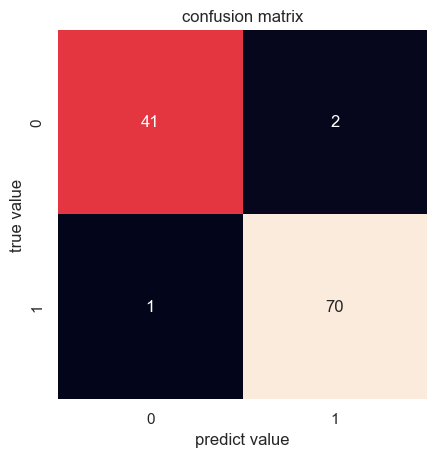

In [25]:
# confusion matrix

from sklearn.metrics import confusion_matrix,classification_report

matric = confusion_matrix(y_test,predict)

sns.heatmap(matric,square=True,annot=True,cbar=False)
plt.xlabel("predict value")
plt.ylabel("true value")
plt.title("confusion matrix")
plt.show()

In [30]:
# recall, f1-score
print(classification_report(y_test,predict,labels=[1,0],target_names=["良性","惡性"]))

              precision    recall  f1-score   support

          良性       0.97      0.99      0.98        71
          惡性       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



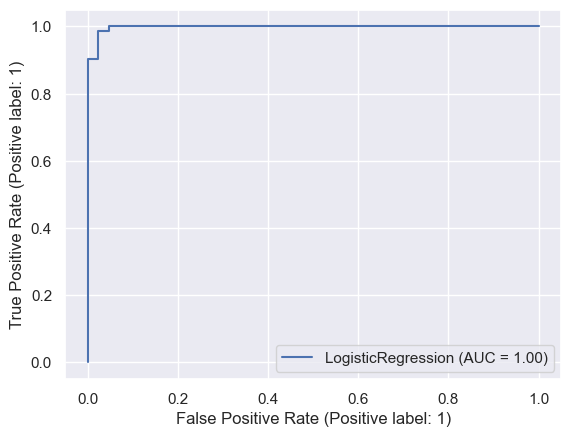

In [34]:
# 分類模型也可以使用 ROC Curve 與 AUC 評估
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, x_test_std, y_test)
plt.show()

綜合不同模型的衡量指標來看，可以發現使用邏輯斯回歸的成效不錯，對於乳癌的預測具有良好的效果。

## a. 使用 statsmodels 套件操作

In [5]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [6]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 使用 赤池訊息量準則 (Akaike information criterion, AIC) 挑選解釋變數

In [32]:
# 比較空模型與包含解釋變數的模型哪個合適, AIC 越小的模型表示裡面的解釋變數更重要
mod_glm_null = smf.glm(
    formula="target ~ 1", 
    data=data,
    family=sm.families.Binomial()    
    ).fit()

print('空模型 AIC =', mod_glm_null.aic.round(3))

空模型 AIC = 753.44


In [23]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [31]:
# 通常模型加入的解釋變數越多, AIC 會越低 
formula = "target ~ Q('mean radius') + Q('mean texture') + Q('mean perimeter') + Q('mean area') + Q('mean smoothness') + Q('mean compactness') + Q('mean concavity') + Q('mean concave points')"
mod_glm = smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit()
print('AIC =', mod_glm.aic.round(3))

AIC = 167.239


In [33]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  569
Model:                            GLM   Df Residuals:                      560
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -74.619
Date:                Sun, 17 Sep 2023   Deviance:                       149.24
Time:                        01:34:37   Pearson chi2:                     235.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6530
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.9548     10.586      1.035      0.301      -9.794      31.703
Q('mean radius')             1.7315      3.533      0.490      0.624      -5.193       8.656
Q('mean texture')           -0.3794      0.063     -5.980      0.000      -0.504      -0.255
Q('mean perimeter')          0.0720      0.478      0.151      0.880      -0.865       1.009
Q('mean area')              -0.0368      0.016     -2.303      0.021      -0.068      -0.005
Q('mean smoothness')       -79.6441     32.100     -2.481      0.013    -142.559     -16.729
Q('mean compactness')        7.3936     15.411      0.480      0.631     -22.811      37.598
Q('mean concavity')         -7.8940      7.717     -1.023      0.306     -23.020       7.232
Q('mean concave points')   -70.9185     28.251     -2.510      0.012    -126.290     -15.547
============================================================================================
"""

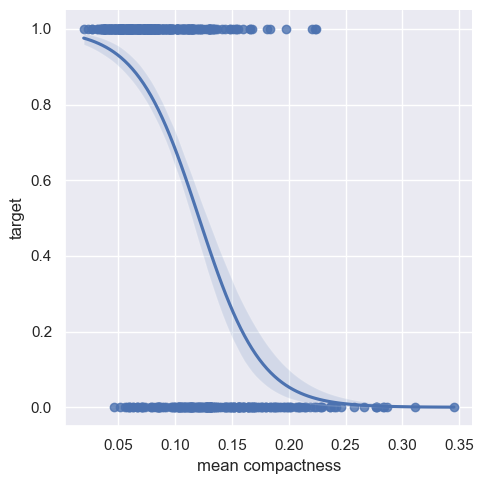

In [43]:
# 畫 Logistics 迴歸線
sns.lmplot(x='mean compactness', y= 'target', data=data, logistic=True)